In [1]:
import tensorflow as tf

In [8]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [13]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [15]:
x_train/=255
x_test/=255

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 15ms/step - loss: 0.1993 - accuracy: 0.9412
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0788 - accuracy: 0.9764
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0534 - accuracy: 0.9834
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0413 - accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0328 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0272 - accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0239 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0206 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0183 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 29s 15m

In [20]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0585 - accuracy: 0.9857


[0.05846375226974487, 0.9857000112533569]

7


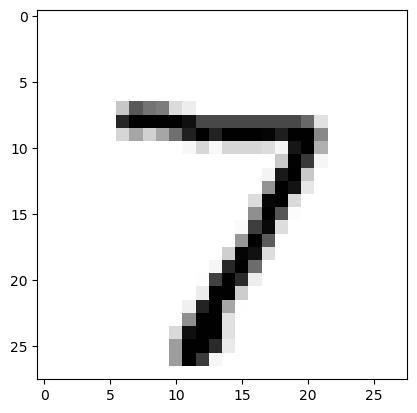

In [26]:
import matplotlib.pyplot as plt
image_index=0
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
predict=x_test[image_index].reshape(28,28)
pred=model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())